# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jabor
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | bikenibeu village
Processing Record 4 of Set 1 | sanya
Processing Record 5 of Set 1 | ponta delgada
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | yanchep
Processing Record 12 of Set 1 | taoudenni
Processing Record 13 of Set 1 | grand falls-windsor
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | elko
Processing Record 16 of Set 1 | argo
Processing Record 17 of Set 1 | lilongwe
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | qamdo
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | papatowai
Processing Record 23 of Set 1 | gry

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jabor,5.9210,169.6434,28.38,82,66,7.42,MH,1715596795
1,thompson,55.7435,-97.8558,-2.91,86,100,2.57,CA,1715596795
2,bikenibeu village,1.3673,173.1241,28.98,79,20,3.60,KI,1715596796
3,sanya,18.2431,109.5050,30.09,70,20,3.00,CN,1715596796
4,ponta delgada,37.7333,-25.6667,20.40,77,75,4.12,PT,1715596796


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jabor,5.9210,169.6434,28.38,82,66,7.42,MH,1715596795
1,thompson,55.7435,-97.8558,-2.91,86,100,2.57,CA,1715596795
2,bikenibeu village,1.3673,173.1241,28.98,79,20,3.60,KI,1715596796
3,sanya,18.2431,109.5050,30.09,70,20,3.00,CN,1715596796
4,ponta delgada,37.7333,-25.6667,20.40,77,75,4.12,PT,1715596796


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

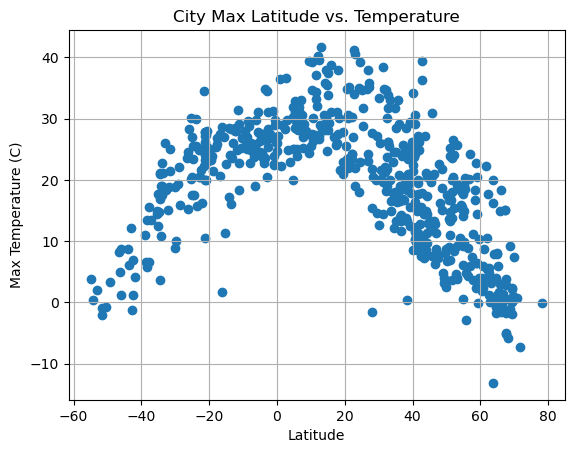

In [9]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

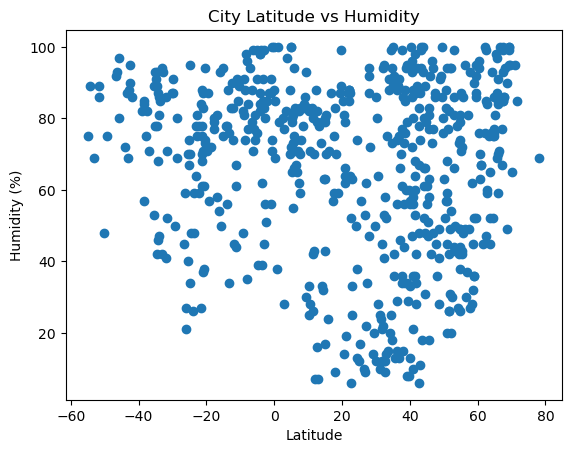

In [10]:
# Build the scatter plots for latitude vs. humidity
x2 = city_data_df["Lat"]
y2 = city_data_df["Humidity"]
# Incorporate the other graph properties
plt.scatter(x2,y2)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

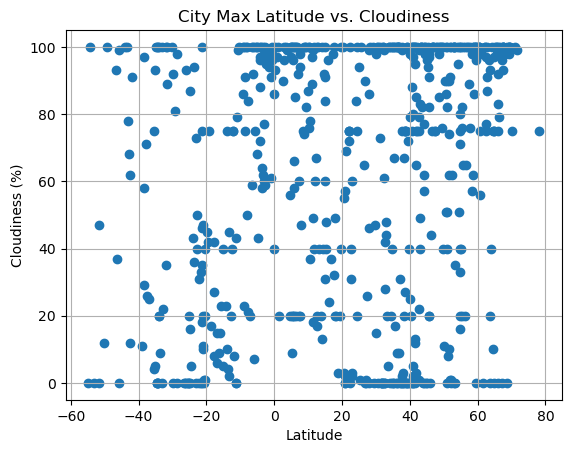

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x3 = city_data_df["Lat"]
y3 = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x3,y3)
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

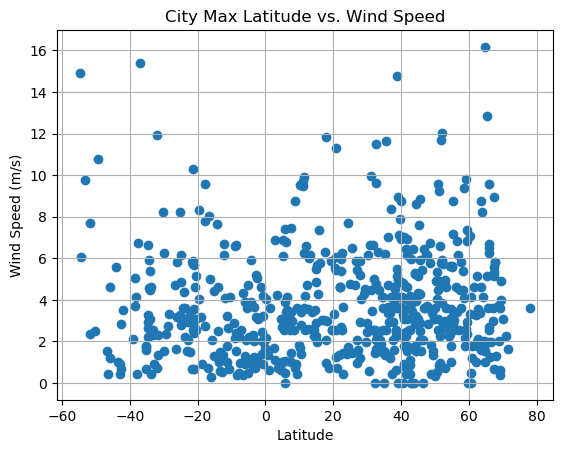

In [12]:
# Build the scatter plots for latitude vs. wind speed
x4 = city_data_df["Lat"]
y4 = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x4,y4)
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is : {rvalue}")
    

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_position,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jabor,5.9210,169.6434,28.38,82,66,7.42,MH,1715596795
1,thompson,55.7435,-97.8558,-2.91,86,100,2.57,CA,1715596795
2,bikenibeu village,1.3673,173.1241,28.98,79,20,3.60,KI,1715596796
3,sanya,18.2431,109.5050,30.09,70,20,3.00,CN,1715596796
4,ponta delgada,37.7333,-25.6667,20.40,77,75,4.12,PT,1715596796


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,margaret river,-33.9500,115.0667,19.06,47,100,4.47,AU,1715596500
7,touros,-5.1989,-35.4608,27.65,76,100,4.69,BR,1715596796
9,adamstown,-25.0660,-130.1015,20.46,67,0,3.13,PN,1715596796
10,yanchep,-31.5500,115.6833,25.07,52,100,1.36,AU,1715596797
13,west island,-12.1568,96.8225,27.99,83,75,6.69,CC,1715596797


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.7736070510766981


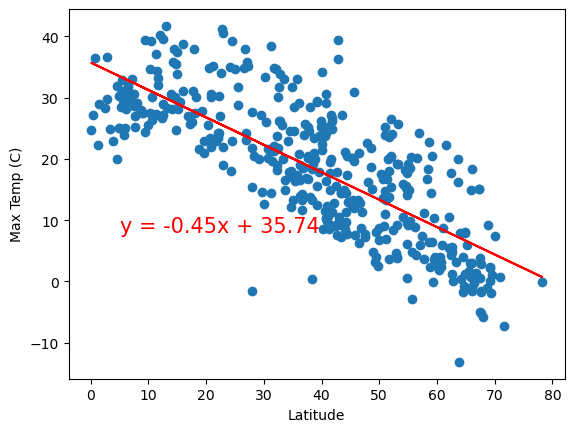

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (C)", (5, 8))

The r-value is : 0.7798848449987352


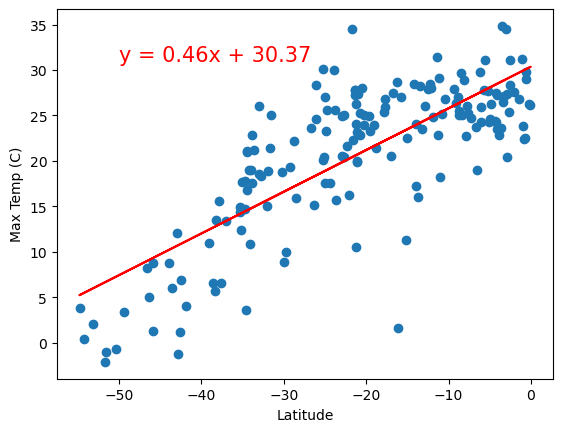

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (C)", (-50, 31))

**Discussion about the linear relationship:** As seen in the graphs above, there is a strong negative relationship between latitude and max temp for the Northern Hemisphere. As latitude increases, the max temperature decreases. There is also a strong positive relationship between latitude and max temp in the Southern Hemisphere. Meaning that as one increases, the other does as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.10101900165710744


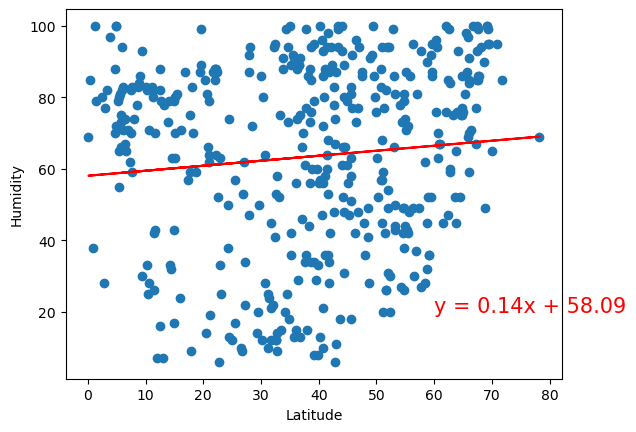

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (60, 20))

The r-value is : 0.03707765803730924


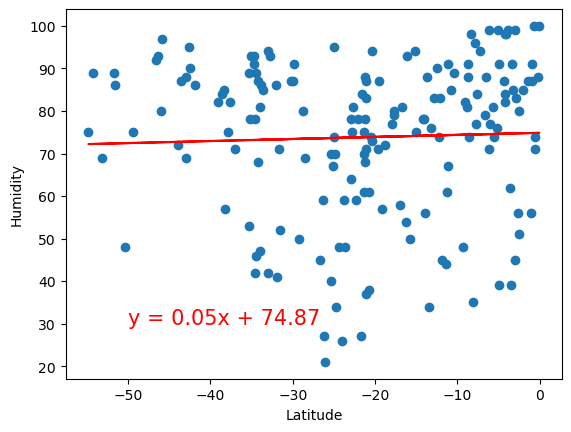

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (-50, 30))

**Discussion about the linear relationship:** Both the northern and southern hemishpeheres are experiencing extremely weak relationships between latitude and humidity. This means we cannot say with confidence that these factors correlate with each other. From first glance, before adding the regression line, I would expect there to be a weak relationship for both plots as the points are very spreadout.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.12345625515028334


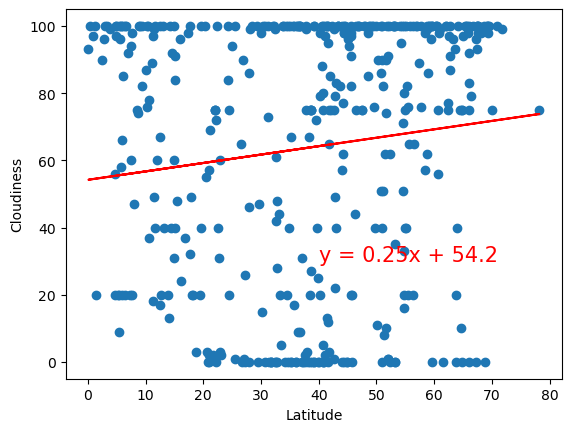

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (40, 30))

The r-value is : 0.24669263353869378


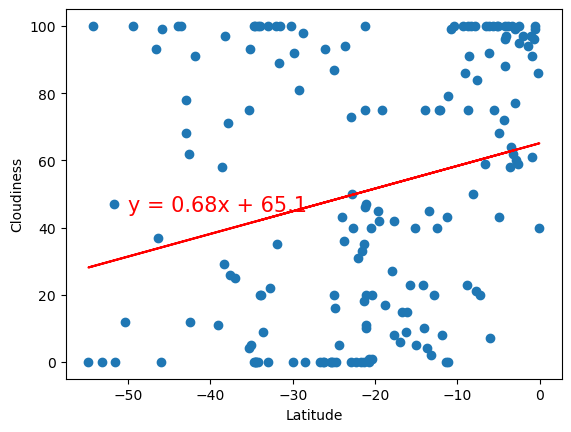

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (-50, 45))

**Discussion about the linear relationship:** The northern hemisphere is expreiencing an extremely weak positive relationship between laitude and cloudiness. The southern hemisphere is experiencing a slight stronger, but still weak, positive relationship between latidude and cloudiness. Although they are showcasing an upwards trend, the relationship is to weak to be able to say that there is a correlation between these two varariables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.04653526082348608


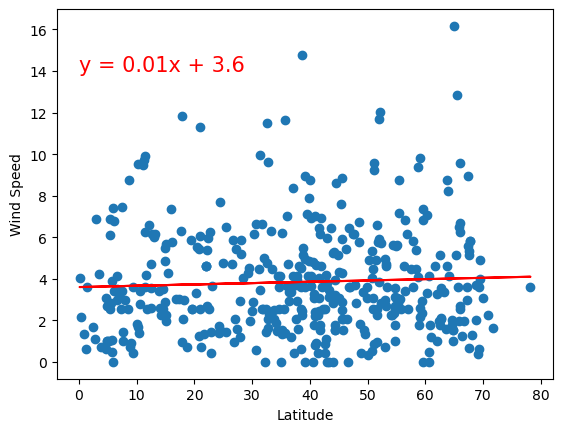

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (0, 14))

The r-value is : -0.2569233899962065


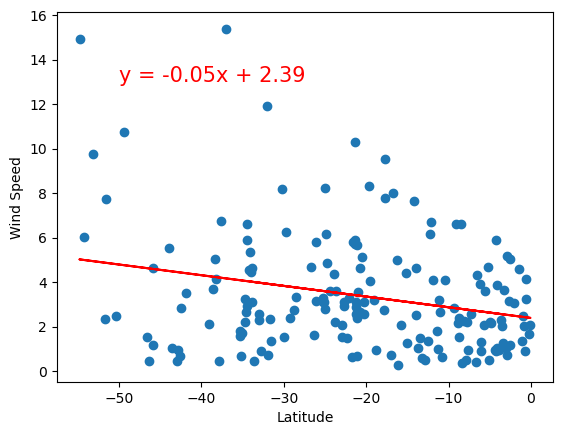

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (-50, 13))

**Discussion about the linear relationship:** For the northern hemisphere, I think that there is no correlation between Latitude and Windspeed and the calculate r-value is 0.04, basically zero. This can also be seen on the scatterplot as the regression line is basically parallel with the x axis. On the other hand, there seems to be a weak negative relationship between Latitude and wind speed for the southern hemisphere.